---

**Universidad de Costa Rica** | Escuela de Ingeniería Eléctrica

*IE0405 - Modelos Probabilísticos de Señales y Sistemas*

### `PyX` - Serie de tutoriales de Python para el análisis de datos


# `Py5` - *Curvas de ajuste de datos*

> Los modelos para describir un fenómeno y sus parámetros pueden obtenerse a partir de una muestra de datos. Debido a la gran cantidad de modelos probabilísticos disponibles, a menudo es necesario hacer una comparación de ajuste entre muchas de ellas.

*Fabián Abarca Calderón* \
*Jonathan Rojas Sibaja*

---

## Ajuste de modelos

El ajuste de modelos es ampliamente utilizado para obtener un modelo matemático que caracterize el comportamiento de cierto sistema basandose en los datos experimentales obtenidos. Este modelo deberá predecir también otras medidas experimentales que se obtengan de su recreación.

### Estimación de máxima verosimilitud (MLE)

(Esto es de menor prioridad) La estimación de máxima verosimilitud (**MLE**, *maximum likelihood estimation*) es...


---
## 5.1 - Con el módulo `numpy`

Para iniciar, con la función `polyfit()` de la librería `numpy` se puede realizar el ajuste de datos experimentals a polinomios de cualquier orden. Esta función devuelve los parámetros de la recta para un modelo lineal de la forma:
$$
f(x) = mx + b
$$
Esto en el caso de un polinomio de grado 1. Un ejemplo utilizando este método es el siguiente:

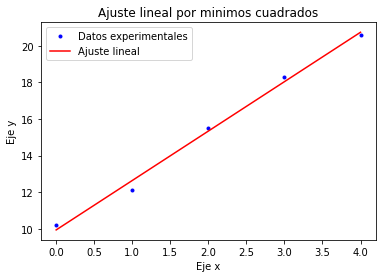

In [ ]:
from numpy import *
import matplotlib.pyplot as plt
# Datos experimentales
x = array([ 0.,  1.,  2.,  3.,  4.])
y = array([ 10.2 ,  12.1,  15.5 ,  18.3,  20.6 ])

# Ajuste a una recta (polinomio de grado 1)
p = polyfit(x, y, 1)
# Una vez conocidos los parámetros de la recta de ajuste,
#se pueden utilizar para graficar la recta de ajuste.
y_ajuste = p[0]*x + p[1]

# Dibujamos los datos experimentales
p_datos, = plt.plot(x, y, 'b.')
# Dibujamos la recta de ajuste
p_ajuste, = plt.plot(x, y_ajuste, 'r-')

plt.title('Ajuste lineal por minimos cuadrados')

plt.xlabel('Eje x')
plt.ylabel('Eje y')

plt.legend(('Datos experimentales', 'Ajuste lineal'), loc="upper left")

En el caso de otro tipo de regresiones, se debe aumentar el grado del polinomio. Por ejemplo, el caso de una regresió polinomial se muestra a continuación:

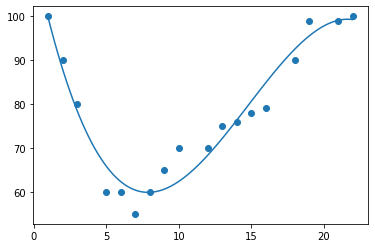

In [ ]:
import numpy
import matplotlib.pyplot as plt
#Lo primero es crear los vectores que definen los puntos de datos
x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]
#Este método nos permite crear un modelo polinomial
mimodelo = numpy.poly1d(numpy.polyfit(x, y, 3))
#Esto determina cómo se mostrara la línea, la cual inicia en 1 
#y termina en 22
milinea = numpy.linspace(1,22,100)
#Y por último graficamos los datos y la curva de
#la regresion polinomial
plt.scatter(x,y)
plt.plot(milinea, mimodelo(milinea))
plt.show()

Una vez trazada la recta de mejor ajuste, se puede obtener el valor de un punto dado, evaluando la curva en dicho punto. por ejemplo si quisieramos obtener el valor dado para un valor de 17 en el eje x, entonces sería:

In [ ]:
valor = mimodelo(17)
print(valor)

88.87331269697991


---
## 5.2 - Con el módulo `stats`

En este caso existen diversos comandos que pueden ser utilizados para crear diferentes distribuciones basadas en datos dados. por ejemplo, partiendo de los datos de un histograma de una PDF, se puede crear el la curva de dicha distribución normal utiliando el comando `scipy.stats.rv_histogram`, además también se puede graficar el CDF de dichos datos: 

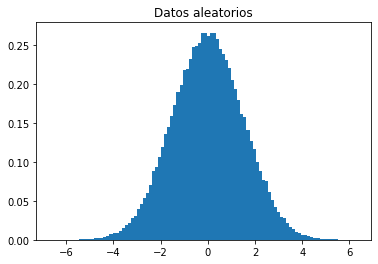

In [ ]:
  import scipy.stats
  import numpy as np
  import matplotlib.pyplot as plt

  data = scipy.stats.norm.rvs(size=100000, loc=0, scale=1.5, random_state=123)
  hist = np.histogram(data, bins=100)
  hist_dist = scipy.stats.rv_histogram(hist)
  X = np.linspace(-5.0, 5.0, 100)
  plt.title("Datos aleatorios")
  plt.hist(data, density=True, bins=100)
  plt.show()

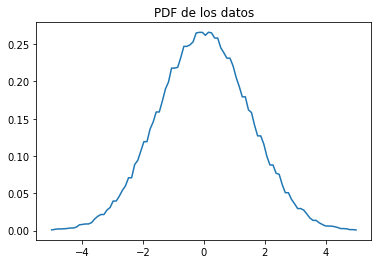

In [ ]:
X = np.linspace(-5.0, 5.0, 100)
plt.title("PDF de los datos")
plt.plot(X, hist_dist.pdf(X), label='PDF')
plt.show()

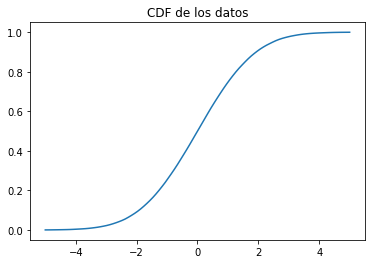

In [ ]:
X = np.linspace(-5.0, 5.0, 100)
plt.title("CDF de los datos")
plt.plot(X, hist_dist.cdf(X), label='CDF')
plt.show()

Otro paquete que brinda la librería ´Scipy´ es ´optimize´ el cuál tiene algorítmos de curvas de ajuste por medio de la función ´curve_fit´ con la cuál se pueden ajustar curvas de sistemas no lineales utilizando mínimos cuadrados. A continuación un ejemplo de su implementación para encontrar la recta de mejor ajuste ante una serie de datos experimentales obtenidos:

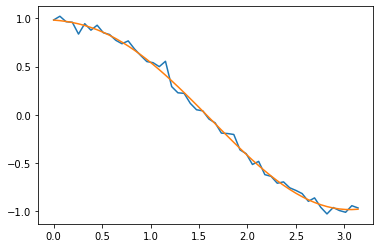

In [ ]:
import numpy
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def _polynomial(x, *p):
       """Ajuste polinomial de grado arbitrario"""
       poly = 0.
       for i, n in enumerate(p):
           poly += n * x**i
       return poly

# Se definen los datos experimentales:
x = numpy.linspace(0., numpy.pi)
y = numpy.cos(x) + 0.05 * numpy.random.normal(size=len(x))

# p0 es la suposición inicial para los coeficientes de ajuste, este valor
# establece el orden del polinomio que desea ajustar. Aquí yo
# ya establecí todas las conjeturas iniciales en 1., es posible que tenga una mejor idea de
# qué valores esperar en función de sus datos.
p0 = numpy.ones(6,)

coeff, var_matrix = curve_fit(_polynomial, x, y, p0=p0)

yfit = [_polynomial(xx, *tuple(coeff)) for xx in x]

plt.plot(x, y, label='Test data')
plt.plot(x, yfit, label='fitted data')

plt.show()

---
## 5.3 - Con la librería `fitter`

Si es necesario, el paquete de `fitter` provee una simple clases la cual identifica la distribución de la cuál las muestras de datos son generados. Utiliza 80 distribuciones de Scipy y permite graficar los resultados para verificar que dicha distribución es la que mejor se ajusta a los datos. En el siguiente ejemplo se generarán los una muestra de 1000 puntos con una distribución gamma, para luego utilizar `fitter` el cuál revisará las 80 distribuciones de Scipy y desplegará un resumen con las distribuciones que calzan de mejor forma con nuestros datos, basandose en la suma del cuadrado de los errores. Los resultados del resumen se puede verificar de manera visual en las gráficas que dicho resumen traza por sí mismo:

In [ ]:
!pip install fitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 47 kB 3.1 MB/s 
  Created wheel for fitter: filename=fitter-1.4.0-py3-none-any.whl size=25026 sha256=e114c6fed7cd062b9b496fb22d47b091694fc48362fb56fa5b6bdad9dac630fd
  Stored in directory: /root/.cache/pip/wheels/e1/98/16/e5263962f94fbfaad79902aa94652516caccc1f1d51509e853
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64232 sha256=6764c6e5d4f59e13537922b54eebe81d17367c09d75a08cc9d0b632ab46e2c21
  Stored in directory: /root/.cache/pip/wheels/82/ab/83/fdfc4017ea44a585b6754752cc5f63f2d0d63fcc1317e7174b
Successfully built fitter easydev


,sumsquare_error,aic,bic,kl_div
gamma,0.031017,846.283920,-10360.239457,inf
rayleigh,0.054661,1035.270857,-9800.548194,inf
uniform,0.428291,586.537606,-7741.892671,inf


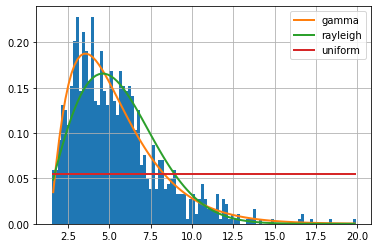

In [ ]:
from scipy import stats
from fitter import Fitter

# Crear los datos
data = stats.gamma.rvs(2, loc=1.5, scale=2, size=1000)

# Definir cuáles distribuciones queremos que evalúe
f = Fitter(data, distributions=['gamma', 'rayleigh', 'uniform'])
f.fit()
f.summary()

Por último, un ejemplo que que ilustra la combinación de el paquete ´scipy.stats´ y ´fitter´ es mediante el modulo ´histfit´, el cuál permite graficar tanto los datos y también las curvas de mejor ajuste al agregar ruido a la medición y calcular ese ajuste en 10 ocaciones, ´Nfit = 10´. En este caso la serie de datos utilizada corresponde a una distribuación normal (creada con el paquete ´scipy.stats´) y se obtuvieron 10 curvas de mejor ajuste ante diversos casos de ruido (con ´error_rate = 0.01´) y además se obtuvo un estimado de los valores correspondientes a la media, la varianza y la amplitud de la distribución de las curvas de mejor ajuste.

2.0236705133031334 3.4256160592635836 0.8806371005547773


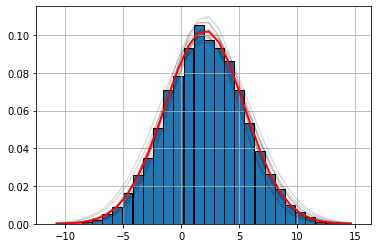

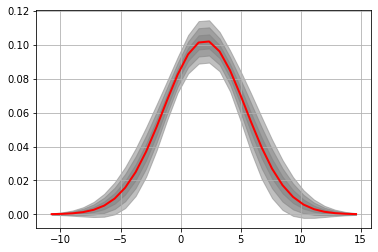

In [ ]:
from fitter import HistFit
from pylab import hist
import scipy.stats
#Creamos la curva con distribución normal
data = [scipy.stats.norm.rvs(2,3.4) for x in  range(10000)]
#Graficamos los valores asignándoles espaciamiento temporal
Y, X, _ = hist(data, bins=30)
#Creamos las curvas de mejor ajuste
hf = HistFit(X=X, Y=Y)
#Aplicamos un margen de error para simular ruido y calcular 10
#curvas de mejor ajuste
hf.fit(error_rate=0.01, Nfit=10)
#Obtenemos los valores correspondientes a la media, la varianza y 
#la amplitud de las curvas de mejor ajuste
print(hf.mu, hf.sigma, hf.amplitude)

---
### Más información

* [Página web](https://www.google.com/)
* Libro o algo
* Tutorial [w3schools](https://www.w3schools.com/python/)

---
**Universidad de Costa Rica** | Facultad de Ingeniería | Escuela de Ingeniería Eléctrica

&copy; 2021

---